# Setup

In [1]:
# Common imports
import sys
import sklearn
import numpy as np

# The iris dataset
This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of 3 different species:

Iris virginica (class 0)<br/>
Iris versicolor (class 1)<br/>
Iris setosa (class 2)<br/>

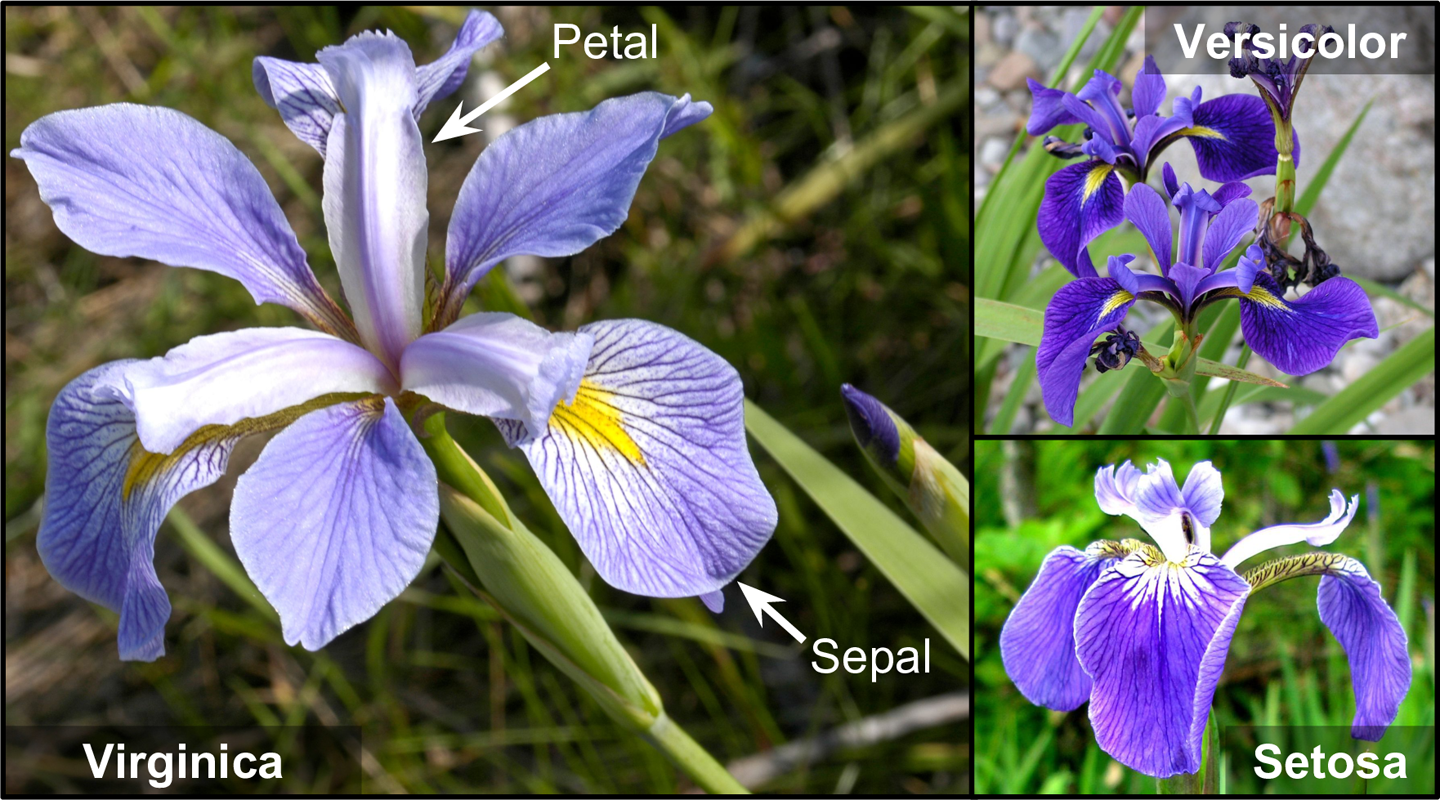

In [2]:
# Load the iris dataset:
from sklearn.datasets import load_iris

# Returning a pandas DataFrame (good for displaying the data):
(features, labels) = load_iris(return_X_y=True, as_frame=True)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Returning a NumPy array (default) containing the last two features, petal length and width.
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

# Training
Decision trees can be used for classification (DecisionTreeClassifier) and regression (DecisionTreeRegressor). Regression was covered in my "Chap_2_Housing" Jupyter notebook. Here i will focus on classification.

For regression, the training algorithm tries to create a decision tree that minimizes the MSE.
For classification, the training algorithm tries to create a decision tree that minimizes impurity (explained below).

In [4]:
# Train a decision tree classifier (feature scaling is not required):
from sklearn.tree import DecisionTreeClassifier

# The random_state parameter ensures deterministic behavior, when set to an integer value.
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [5]:
# 6. Plot the decision tree

[Text(0.4, 0.8333333333333334, 'sepal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'sepal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

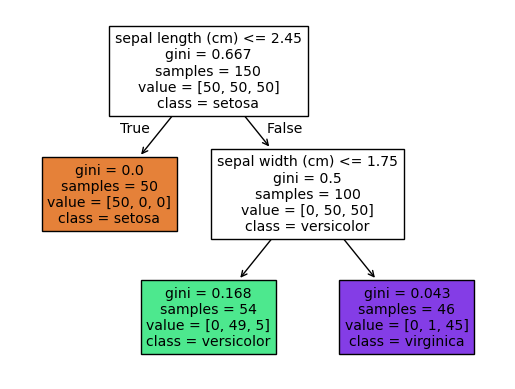

In [6]:
from sklearn.tree import plot_tree
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)

### The trained decision tree
The samples attribute counts how many training instances the node appies to.<br/>
The value attribute shows how many training instances of each class the node applies to.<br/>
The gini attribute measures the nodes impurity. A node is pure (gini=0) if all training instances it applies to belong to the same class.<p/>
A decision tree is a so-called white box model. This means it is easy to explain in simple terms why the predictions were made.

### Decision boundaries
The vertical dotted lines represent decision boundaries which would be added, if you set the decision tree's max_depth to 3 instead of 2.

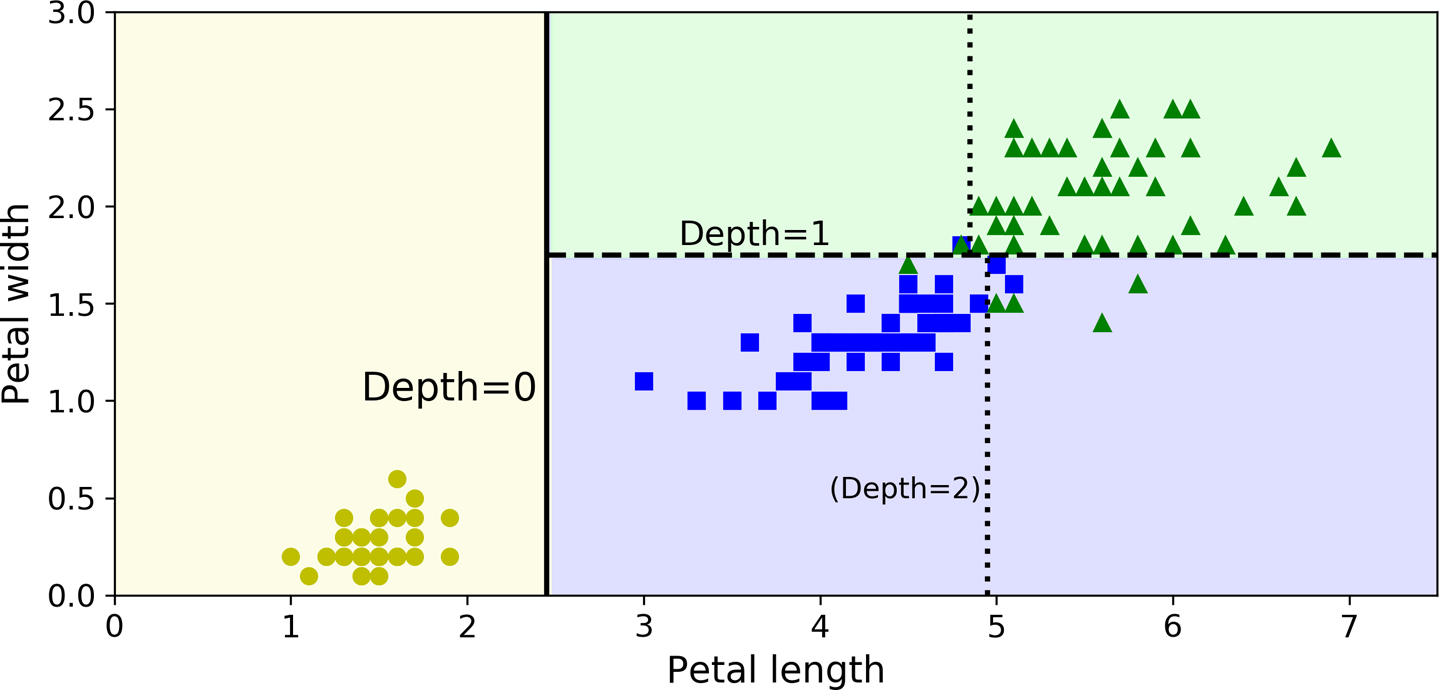

Decision trees are very sensitive to small variations in the training data. For example, if we remove the widest Iris versicolor sample from the training set, you get the following decision boundaries:

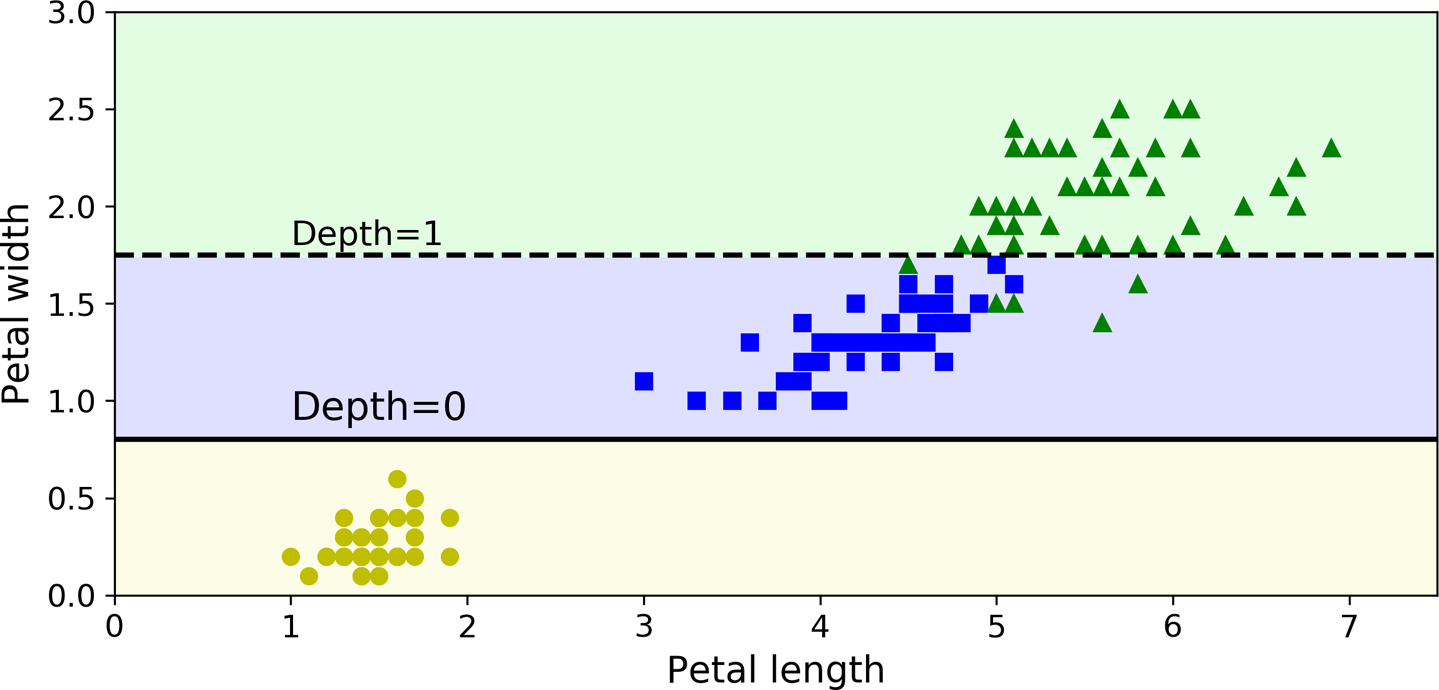

We can limit this kind of instability by averaging predictions over many trees. This can be done with more advanced ML model architectures such Random Forests or Gradient Boosting.


# Predicting classes and class probabilities
Iris flower whose petals are 5 cm long and 1.5 cm wide. 

In [7]:
# Predicting a class:
tree_clf.predict([[5, 1.5]])

array([1])

In [8]:
# Predicting class probabilities:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

# Regularization hyperparameters

Without the use of regularization hyperparameters, the decision tree will adapt itself as close as possible to the training data, which leads to overfitting.

<b>max_depth</b>: maximum depth of the decision tree (we used this in the example above).<br/>
<b>min_samples_split</b>: the minimum number of samples a node must have before it can be split.<br/>
<b>min_samples_leaf</b>: the minimum number of samples a leaf node must have.<br/>
<b>max_leaf_nodes</b>: the maximum number of leaf nodes.<br/>
<b>max_features</b>: the maximum number of features that are evaluated for splitting at each node.



In [9]:
# Split the iris dataset in training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Use GridSearchCV to evaluate all possible combinations of a specified set of hyperparameter values.
from sklearn.model_selection import GridSearchCV

# It uses cross-validation for training. This means that it randomly splits the training set into a number of
# distinct subsets called folds (in this example three folds, cv=3). Then it trains and evaluates the model
# 3 times, picking a different fold for evaluation every time and training on the other 2 folds.

params = {'max_depth': list(range(2, 6)),'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [20, 40, 60]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3)

# Train
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [20, 40, 60]})

In [11]:
# Get the best estimator:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3, min_samples_split=20,
                       random_state=42)

# Evaluate the model's accuracy

<b>accuracy_score</b>: correct predictions / all predictions = (TP + TN) / (TP + TN + FP + FN)

TP is the number of true positives, TN is the number of true negatives, FP is the number of false positives, and FN is the number of true negatives.

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

<b>confusion_matrix</b>: each row represents an actual class, while each column represents a predicted class. Only the predictions along the diagonal
from top-left to bottom-right are correct.

Iris virginica (class 0)<br/>
Iris versicolor (class 1)<br/>
Iris setosa (class 2)<br/>

In [13]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

<b>precision_score</b>: TP / (TP + FP)

In [14]:
precision_score(y_test, y_pred, average=None)

array([1.        , 1.        , 0.91666667])

<b>recall_score</b>: TP / (TP + FN)

In [15]:
recall_score(y_test, y_pred, average=None)

array([1.        , 0.88888889, 1.        ])

In [17]:
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])